# **Primera Versión para segmentar caracteres Braille**

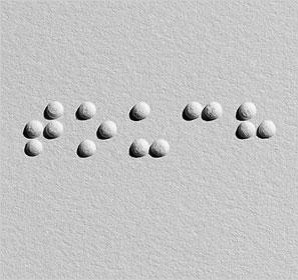

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

# Leer la imagen
image_path = "/content/TOUCH_BRAILE.jpg"
image = cv2.imread(image_path)

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

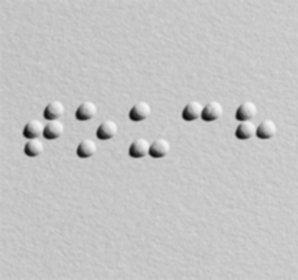

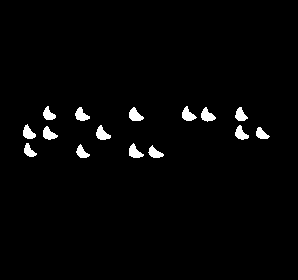

In [2]:
# Aplicar un filtro para reducir ruido
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

cv2_imshow(blurred)

# Umbralización para segmentar los puntos
_, binary1 = cv2.threshold(blurred, 0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours1, _ = cv2.findContours(binary1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

_, binary2 = cv2.threshold(blurred, 0, 255,  cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours2, _ = cv2.findContours(binary2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours1) >= len(contours2):
  binary = binary1.copy()
else:
  binary = binary2.copy()

cv2_imshow(binary)

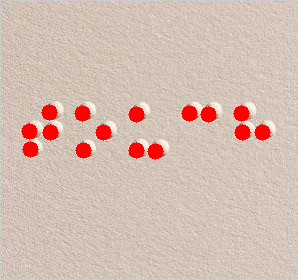

In [5]:
# Encontrar contornos de los puntos
contours, _ = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Calcular los radios de los círculos detectados
radii = []
for contour in contours:
    _, radius = cv2.minEnclosingCircle(contour)
    radii.append(radius)

# Calcular el radio promedio y excluir valores alejados
radii = np.array(radii)
mean_radius = np.mean(radii)
std_dev_radius = np.std(radii)
tolerance = 2  # Tolerancia para filtrar radios
filtered_radii = radii[(radii >= mean_radius - tolerance * std_dev_radius) &
                       (radii <= mean_radius + tolerance * std_dev_radius)]

# Calcular el nuevo radio promedio basado en los radios filtrados
final_radius = int(np.mean(filtered_radii))
final_radius = int(final_radius-(0.1*final_radius))

# Crear una imagen en blanco con el mismo tamaño que la original
output_image1 = np.ones_like(image) * 255  # Fondo blanco
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    if radius in filtered_radii:
        center = (int(x), int(y))
        # Dibujar un círculo sólido con el radio final
        cv2.circle(output_image1, center, final_radius+2, (0, 0, 255), -1)

# Dibujar círculos sólidos en la imagen con el nuevo radio promedio
output_image = image.copy()
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    if radius in filtered_radii:
        center = (int(x), int(y))
        # Dibujar un círculo sólido con el radio final
        cv2.circle(output_image, center, final_radius+2, (0, 0, 255), -1)

# Mostrar la imagen resultante
cv2_imshow(output_image)


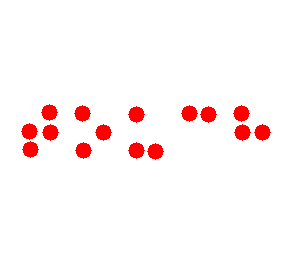

In [6]:
# Mostrar la imagen resultante
cv2_imshow(output_image1)

In [ ]:
# Guardar la imagen resultante
cv2.imwrite("/content/RESULTADOS/FondoBlanco/" + image_name, output_image1)
cv2.imwrite("/content/RESULTADOS/FondoImagen/"+image_name, output_image)

True